In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import math

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

meritve_enakomerno_pospeseno = {
    15.4: (0.159995 + 0.1632723) / 2,
    17.6: (0.1736 + 0.1735) / 2,
    22.1: (0.1950 + 0.1957) / 2,
    32.6: (0.2437 + 0.2449) / 2,
    39.0: (0.2684 + 0.2687) / 2
}

meritve = [
    0.13182,
    0.13180,
    0.13191,
    0.13201,
    0.13165,
    0.13158,
    0.13175,
    0.13228,
    0.13158,
    0.13179,
    0.13198,
    0.13219,
    0.13169,
    0.13188,
    0.13159,
    0.13153,
    0.13152,
    0.13242,
    0.13200,
    0.13152,
    0.13145,
    0.13133,
    0.13160,
    0.13142,
    0.13159,
    0.13180,
    0.13140,
    0.13203,
    0.13182,
    0.13161,
    0.13180,
    0.13148,
    0.13096,
    0.13127,
    0.13156,
    0.13222,
    0.13118,
    0.13195,
    0.13142,
    0.13145,
    0.13065,
    0.13167,
    0.13192,
    0.13169,
    0.13190,
    0.13155,
    0.13200,
    0.13129,
    0.13115,
    0.13139
]



meritve.sort()
print("Stevio meritev:", len(meritve))
print("Povprecen cas:", sum(meritve)/len(meritve))
print("rel. napaka:", max([sum(meritve)/len(meritve)-min(meritve), max(meritve)-sum(meritve)/len(meritve)]) / sum(meritve)/len(meritve))

Stevio meritev: 50
Povprecen cas: 0.13166080000000002
rel. napaka: 3.0709216410656283e-06


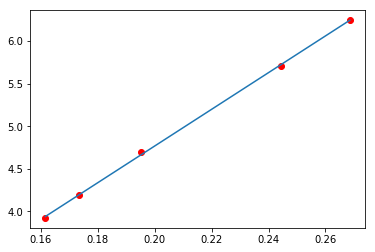

In [4]:
x = [meritve_enakomerno_pospeseno[k] for k in meritve_enakomerno_pospeseno.keys()]
y = [k**0.5 for k in meritve_enakomerno_pospeseno.keys()]
plt.plot(x, y, 'ro')

A = np.vstack([x, np.ones(len(x))]).T
k, n = np.linalg.lstsq(A, y)[0]
yfit = [k * xi + n for xi in x]
plt.plot(x, yfit)

In [11]:
start, stop = min(meritve), max(meritve)
step = (stop-start)/10
diag = []
for i in range(10):
    diag.append(sum([1 for j in meritve if j >= (start + i*step) and j <= (start + (i+1)*step)])/len(meritve))
print(diag)

[0.02, 0.02, 0.04, 0.06, 0.2, 0.24, 0.16, 0.18, 0.04, 0.04]


{'0.1306-0.1308': 0.02, '0.1308-0.131': 0.02, '0.131-0.1312': 0.04, '0.1312-0.1314': 0.06, '0.1314-0.1315': 0.2, '0.1315-0.1317': 0.24, '0.1317-0.1319': 0.16, '0.1319-0.1321': 0.18, '0.1321-0.1322': 0.04, '0.1322-0.1324': 0.04}


([<matplotlib.axis.XTick at 0x7faf0cc8eac8>,
 <a list of 10 Text xticklabel objects>)

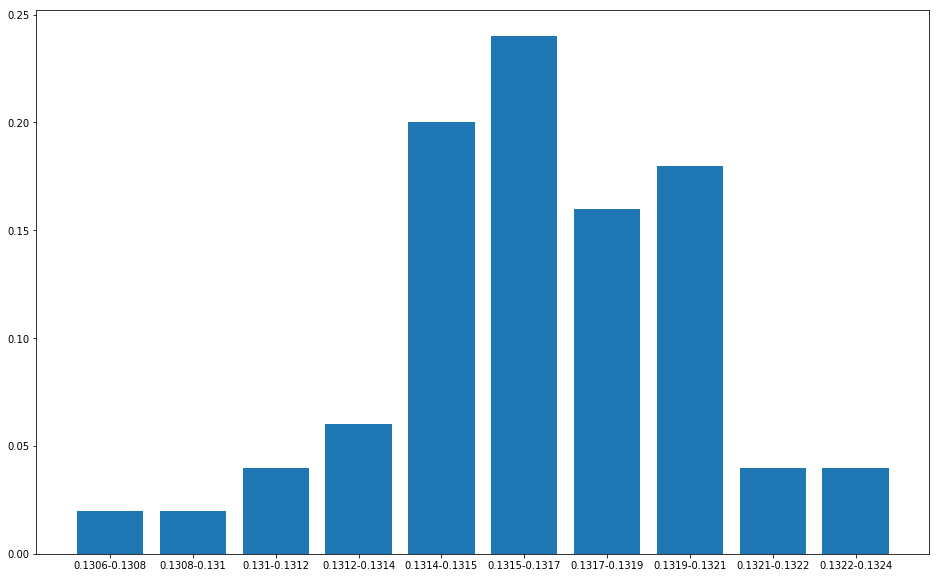

In [30]:
dictionary = plt.figure( figsize=(16, 10))

D = {}
for i in range(len(diag)):
    D[str(round((start + i*step), 4)) + '-' + str(round((start + (i+1)*step), 4))] = diag[i]
print(D)
    
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))


In [10]:
sigma = sum([i**2 for i in meritve])/len(meritve) - sum(meritve)/len(meritve)**2
sigma = sigma**0.5
print(sigma)

err = sigma/(len(meritve)-1)**0.5
print(err)

0.12124957741782029
0.017321368202545755
